In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
arcface = pd.read_json('arcface_file.json')
arcface['verified'] = arcface['verified'].map({"True": 1, "False": 0})

In [8]:
facenet = pd.read_json('facenet_file.json')
facenet['verified'] = facenet['verified'].map({"True": 1, "False": 0})

In [9]:
df = pd.concat([arcface, facenet])

In [10]:
pivot_df = arcface.pivot('file_name_1', 'file_name_2', 'verified')


/var/folders/15/ks9q9zp55y99s4lt86203cn00000gn/T/ipykernel_1094/1213619181.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = arcface.pivot('file_name_1', 'file_name_2', 'verified')


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='coolwarm')
plt.title('Similarity Heatmap')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()

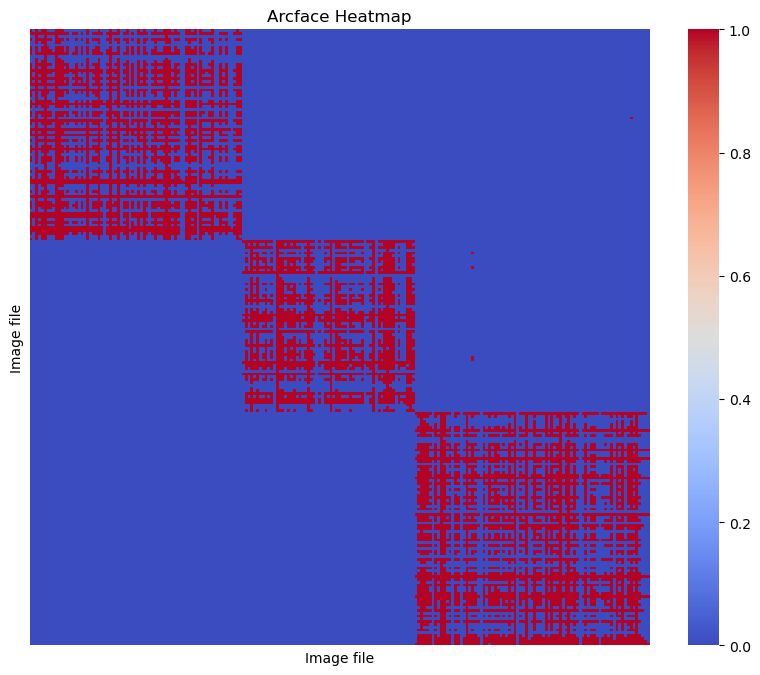

In [22]:
arcface_pivot_df = arcface.pivot(index='file_name_1', columns='file_name_2', values='verified').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(arcface_pivot_df, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Arcface Heatmap')
plt.xlabel('Image file')
plt.ylabel('Image file')
plt.show()


In [41]:
target_file = arcface['file_name_1'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg'
target_folder = arcface['file_name_2'].str.contains('/n007718/')
arcface[target_file & target_folder].verified.value_counts()

1    25
Name: verified, dtype: int64

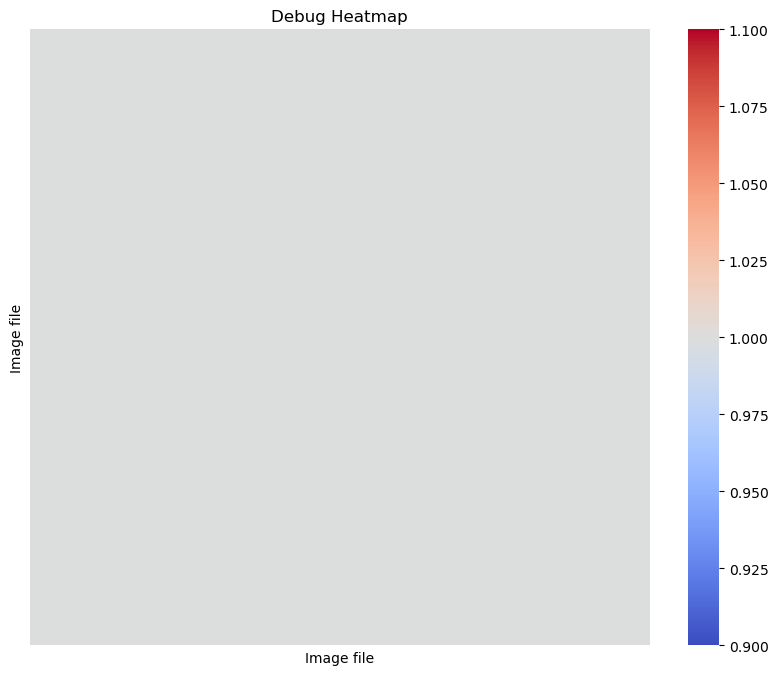

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(arcface[target_file & target_folder].pivot(index='file_name_1', columns='file_name_2', values='verified').fillna(0), cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Debug Heatmap')
plt.xlabel('Image file')
plt.ylabel('Image file')
plt.show()


In [40]:
arcface_pivot_df

file_name_2,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0004_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0005_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0006_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0008_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0010_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0012_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0015_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0016_01.jpg,...,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0215_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0224_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0237_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0274_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0393_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0397_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0398_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0404_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0406_01.jpg,/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0418_02.jpg
file_name_1,,,,,,,,,,,,,,,,,,,,,
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0004_01.jpg,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0005_01.jpg,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0006_01.jpg,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0397_01.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0398_01.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007992/0404_01.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [45]:
arcface[
    (arcface['file_name_1'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg') &
    (arcface['file_name_2'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg')
]

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time,file_name_1,file_name_2


In [46]:
arcface[
    (arcface['file_name_1'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg') &
    (arcface['file_name_2'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg')
]

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time,file_name_1,file_name_2
3418,1,0.240595,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 61, 'y': 76, 'w': 390, 'h': 390...",0.21,/Users/zoria/Data Analytics/VGGFace2_5000+_Sup...,/Users/zoria/Data Analytics/VGGFace2_5000+_Sup...


In [83]:
arcface_mirror = arcface.copy()
arcface_mirror['file_name_1'], arcface_mirror['file_name_2'] = arcface_mirror['file_name_2'], arcface_mirror['file_name_1']
arcface_mirror = arcface_mirror[arcface_mirror['file_name_1'] != arcface_mirror['file_name_2']]

In [99]:
arcface_mirror[
    (arcface_mirror['file_name_1'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg') &
    (arcface_mirror['file_name_2'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg')
]

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time,file_name_1,file_name_2
3418,1,0.240595,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 61, 'y': 76, 'w': 390, 'h': 390...",0.21,/Users/zoria/Data Analytics/VGGFace2_5000+_Sup...,/Users/zoria/Data Analytics/VGGFace2_5000+_Sup...


In [100]:
arcface[
    (arcface['file_name_1'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg') &
    (arcface['file_name_2'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg')
]

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time,file_name_1,file_name_2


In [86]:
arcface.shape, arcface_mirror.shape

((24090, 10), (23871, 10))

In [95]:
double_acrface = pd.concat([arcface_mirror, arcface], ignore_index=True)

In [101]:
double_acrface[
    (double_acrface['file_name_1'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0002_03.jpg') &
    (double_acrface['file_name_2'] == '/Users/zoria/Data Analytics/VGGFace2_5000+_Super_cleaned/n007718/0003_01.jpg')
]

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time,file_name_1,file_name_2
3401,1,0.240595,0.68,ArcFace,opencv,cosine,"{'img1': {'x': 61, 'y': 76, 'w': 390, 'h': 390...",0.21,/Users/zoria/Data Analytics/VGGFace2_5000+_Sup...,/Users/zoria/Data Analytics/VGGFace2_5000+_Sup...


In [89]:
double_acrface.shape

(47961, 10)

/var/folders/15/ks9q9zp55y99s4lt86203cn00000gn/T/ipykernel_1094/3433604317.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  arcface_full_pivot_df = double_acrface.pivot('file_name_1', 'file_name_2', 'verified')


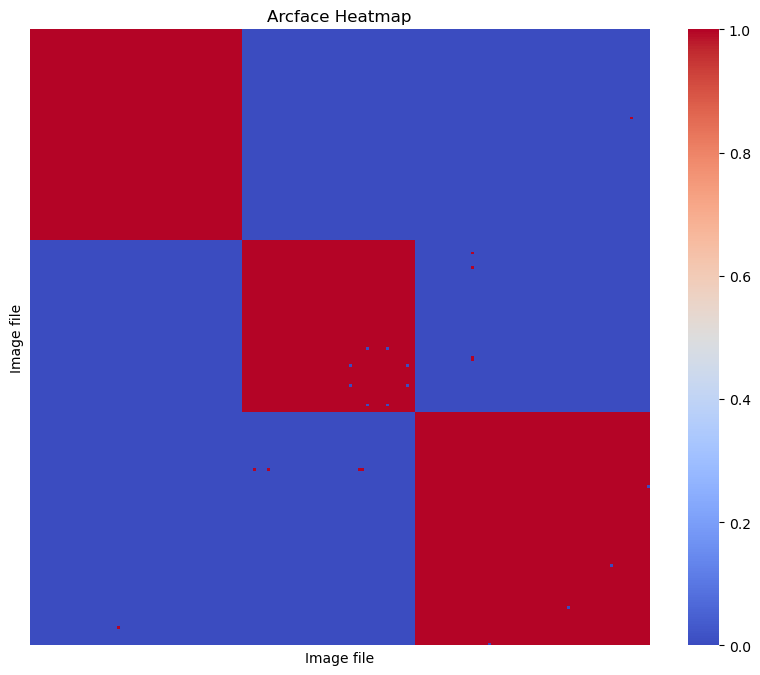

In [102]:
arcface_full_pivot_df = double_acrface.pivot('file_name_1', 'file_name_2', 'verified')

plt.figure(figsize=(10, 8))
sns.heatmap(arcface_full_pivot_df, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Arcface Heatmap')
plt.xlabel('Image file')
plt.ylabel('Image file')
plt.show()


In [108]:
facenet_mirror = facenet.copy()
facenet_mirror['file_name_1'], facenet_mirror['file_name_2'] = facenet_mirror['file_name_2'], facenet_mirror['file_name_1']
facenet_mirror = facenet_mirror[facenet_mirror['file_name_1'] != facenet_mirror['file_name_2']]

In [109]:
double_facenet = pd.concat([facenet_mirror, facenet], ignore_index=True)

/var/folders/15/ks9q9zp55y99s4lt86203cn00000gn/T/ipykernel_1094/1176486312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  facenet_full_pivot_df = double_facenet.pivot('file_name_1', 'file_name_2', 'verified')


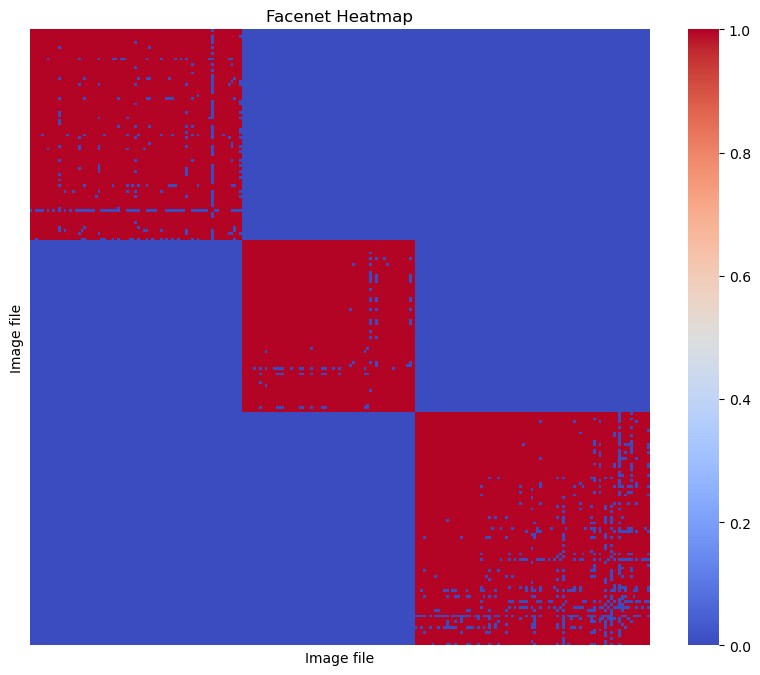

In [110]:
facenet_full_pivot_df = double_facenet.pivot('file_name_1', 'file_name_2', 'verified')

plt.figure(figsize=(10, 8))
sns.heatmap(facenet_full_pivot_df, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Facenet Heatmap')
plt.xlabel('Image file')
plt.ylabel('Image file')
plt.show()
